In [1]:
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt 
from PIL import Image 
import seaborn as sns
import pandas as pd 
import numpy as np 
import os 


In [22]:
imgs = ['airplane.jpg', 'cigarette.jpg', 'wolf.jpg', 'gun.jpg']
shape1=(224, 224)
shape2=(299, 299)

In [23]:

def _load_image(img_path,shape):
    img = image.load_img(img_path, target_size=shape)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img 

In [24]:
def _get_predictions(_model):
    f, ax = plt.subplots(1, 4)
    f.set_size_inches(80, 40)
    for i in range(4):
        ax[i].imshow(Image.open(imgs[i]).resize((200, 200), Image.ANTIALIAS))
    plt.show()
    
    f, axes = plt.subplots(1, 4)
    f.set_size_inches(80, 20)
    for i,img_path in enumerate(imgs):
        if _model == inception_model : 
            img = _load_image(img_path,shape2)
        else : 
            img = _load_image(img_path,shape1)

        preds  = decode_predictions(_model.predict(img), top=3)[0]
        b = sns.barplot(y=[c[1] for c in preds], x=[c[2] for c in preds], color="gray", ax=axes[i])
        b.tick_params(labelsize=55)
        f.tight_layout()    
            
            

## VGG16

C:\Users\Amir\AppData\Local\Temp\ipykernel_14736\121389923.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  ax[i].imshow(Image.open(imgs[i]).resize((200, 200), Image.ANTIALIAS))


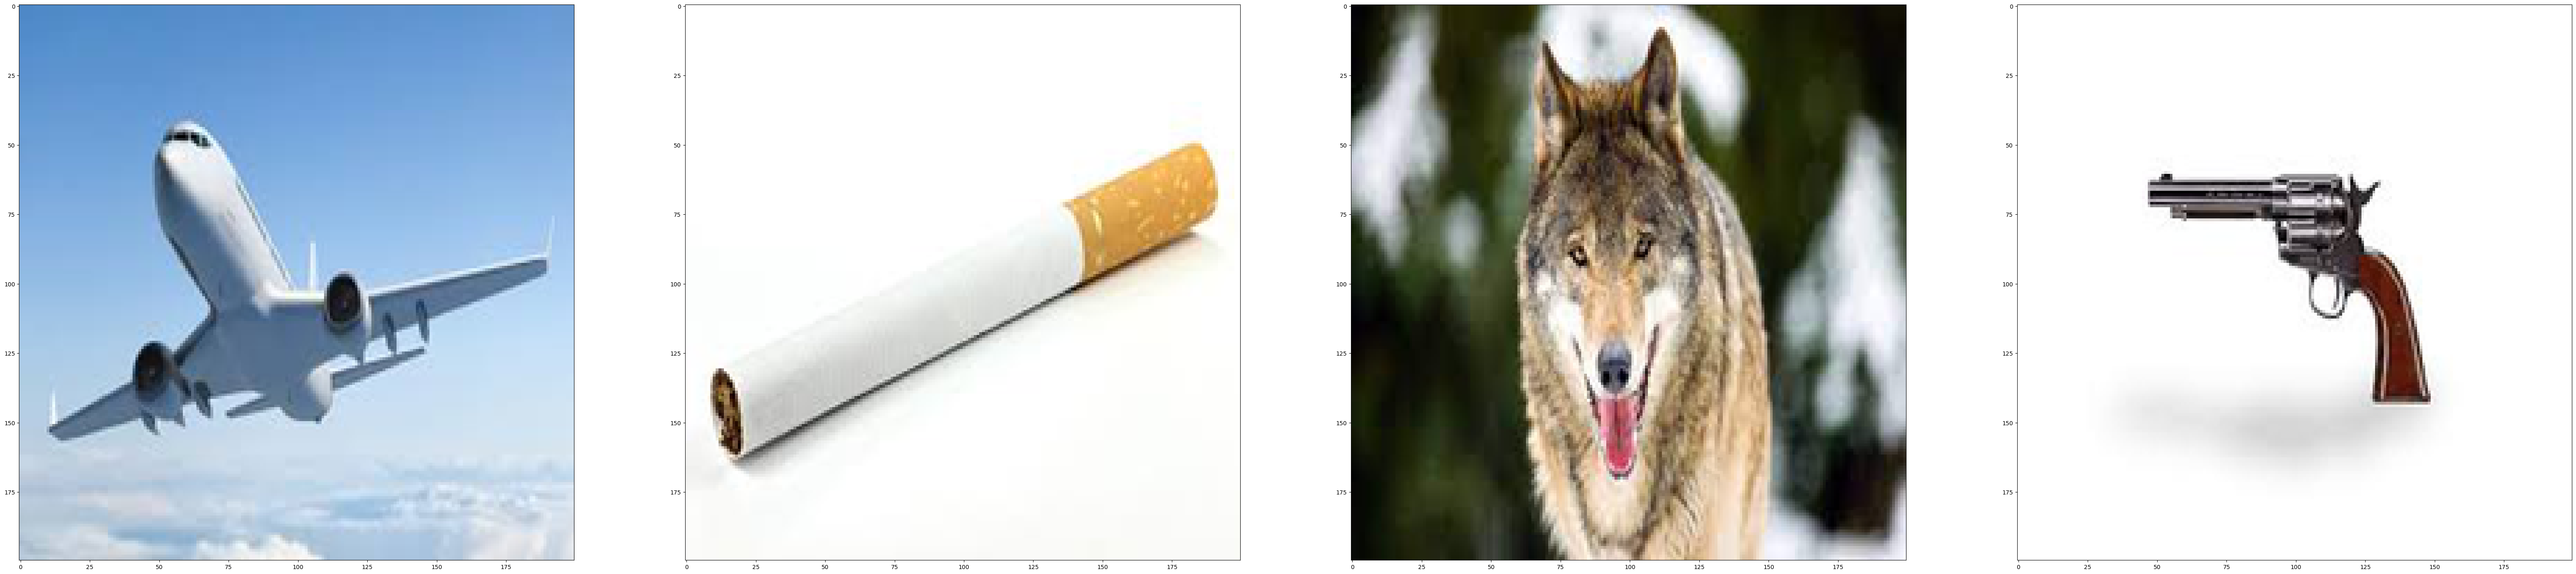

1/1 [==============================] - 0s 121ms/step


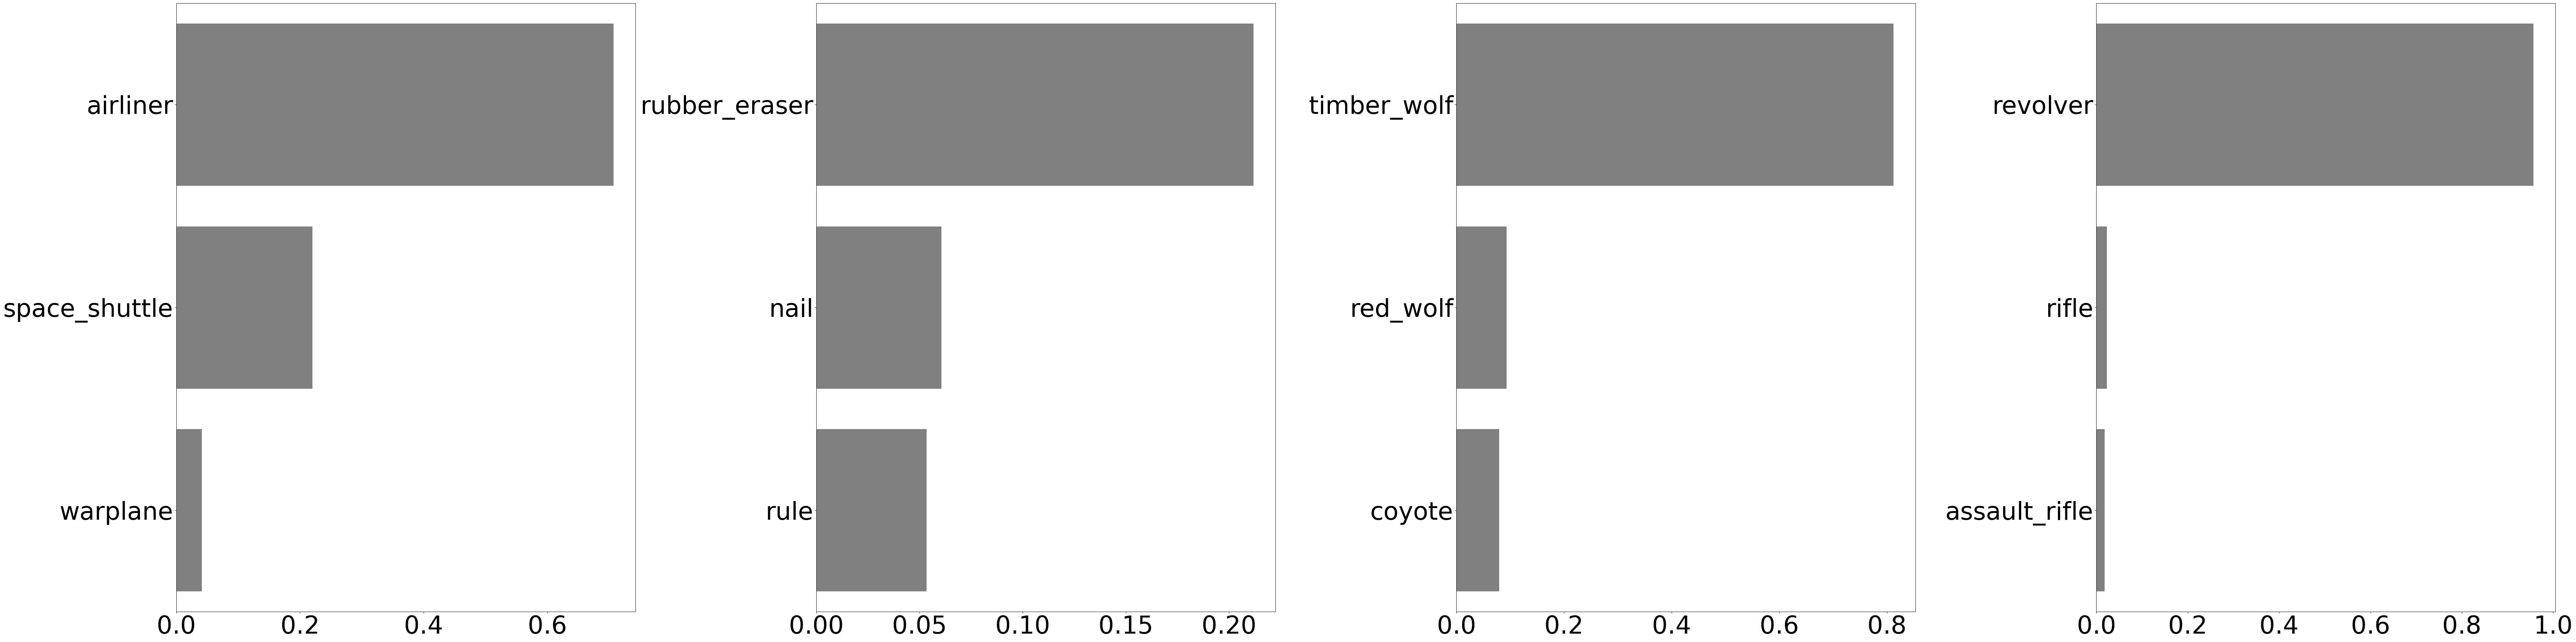

In [15]:
from keras.applications.vgg16 import VGG16
vgg16_model = VGG16(weights='imagenet')
_get_predictions(vgg16_model)

## VGG19

C:\Users\Amir\AppData\Local\Temp\ipykernel_14736\121389923.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  ax[i].imshow(Image.open(imgs[i]).resize((200, 200), Image.ANTIALIAS))


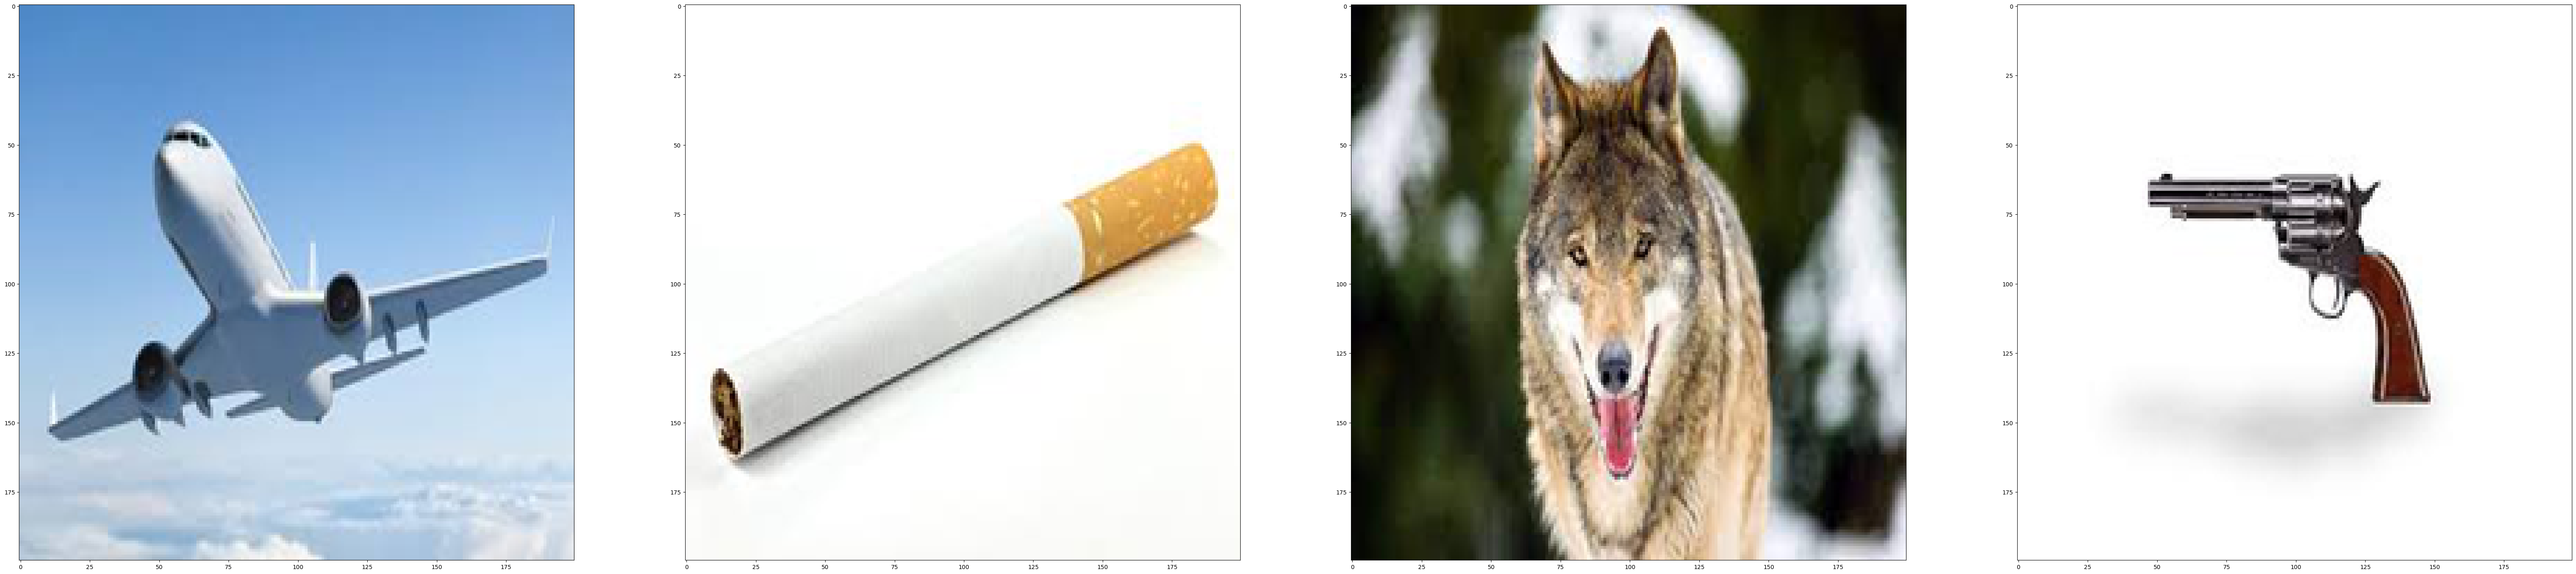

1/1 [==============================] - 0s 114ms/step


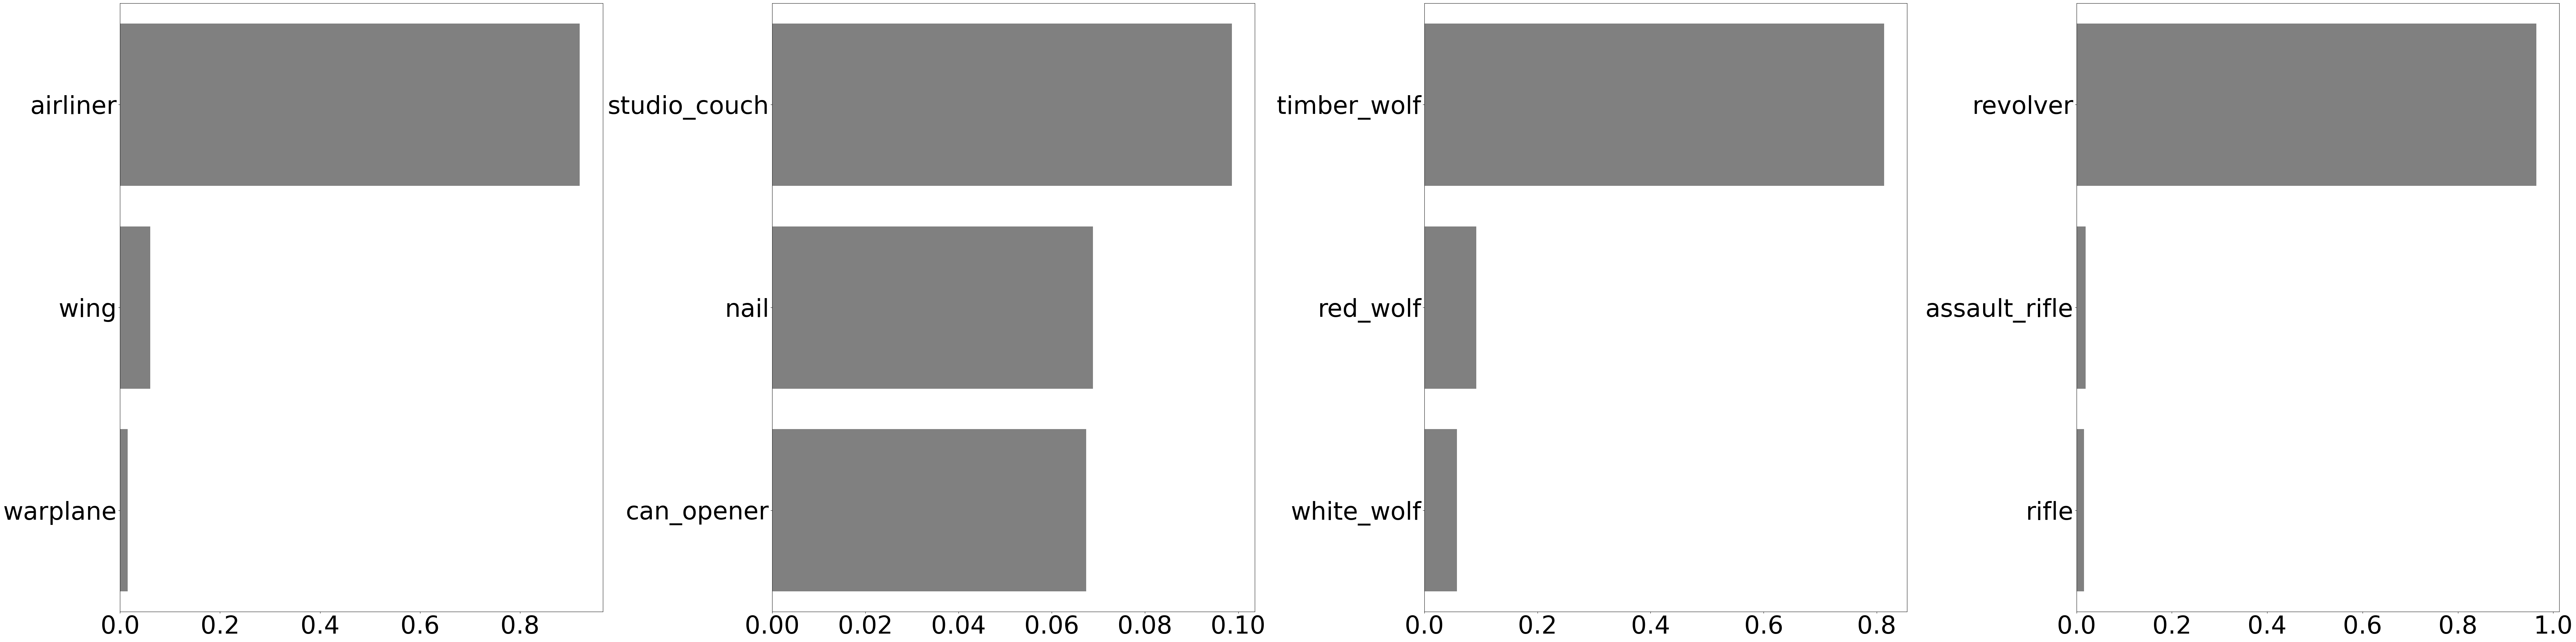

In [16]:
from keras.applications.vgg19 import VGG19
vgg19_model = VGG19(weights='imagenet')
_get_predictions(vgg19_model)

## Inception V3

C:\Users\Amir\AppData\Local\Temp\ipykernel_14736\802705997.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  ax[i].imshow(Image.open(imgs[i]).resize((200, 200), Image.ANTIALIAS))


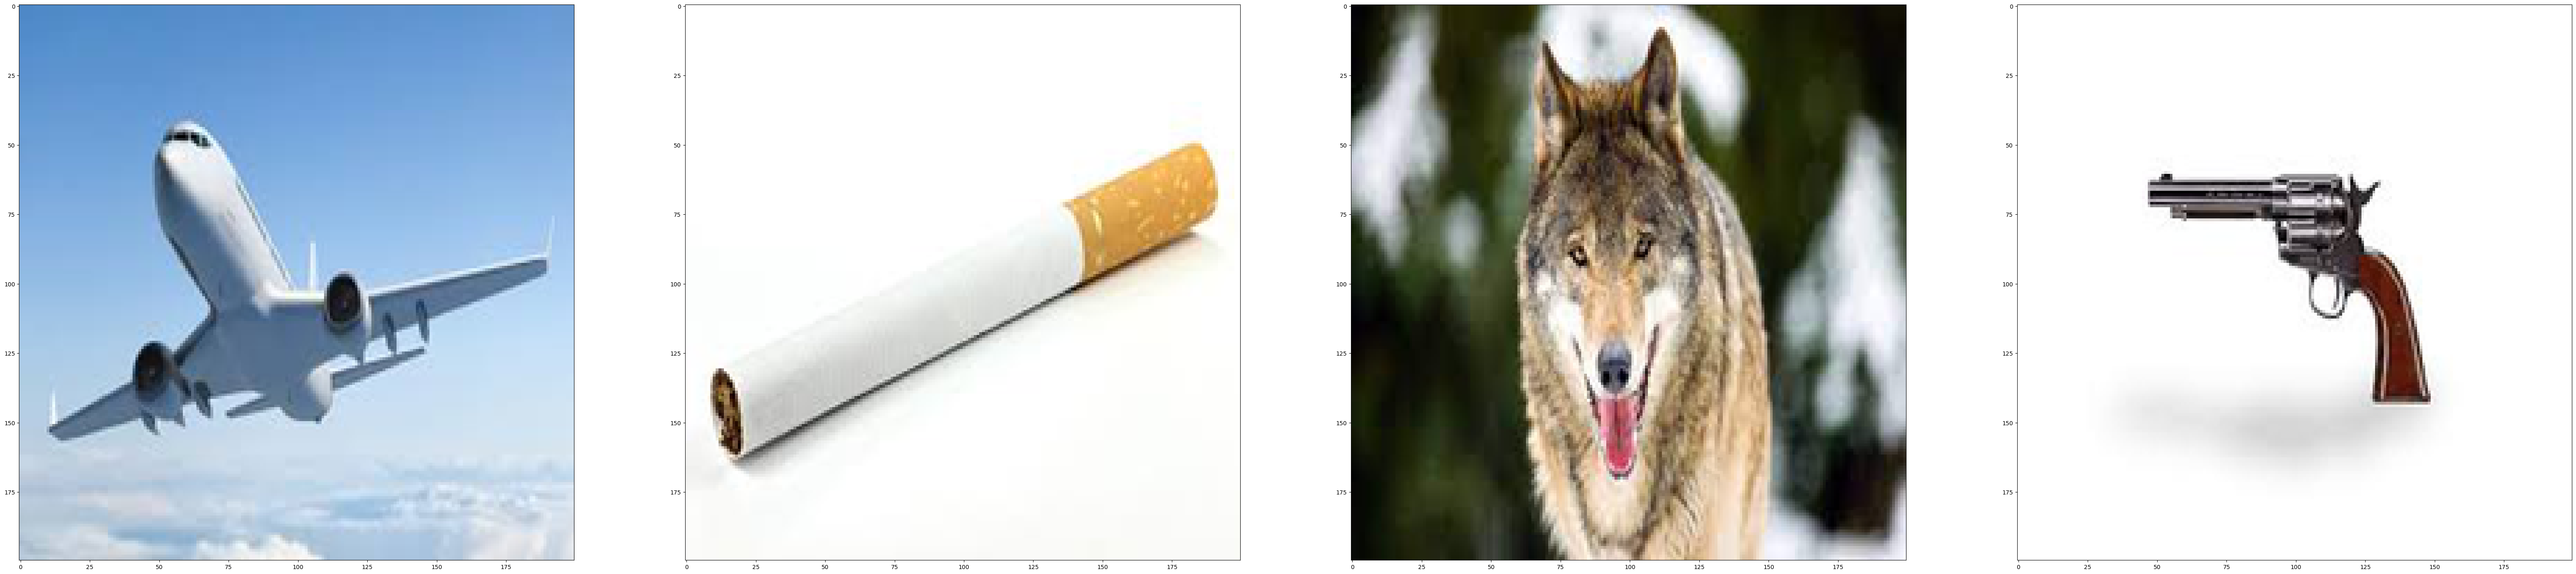

1/1 [==============================] - 0s 57ms/step


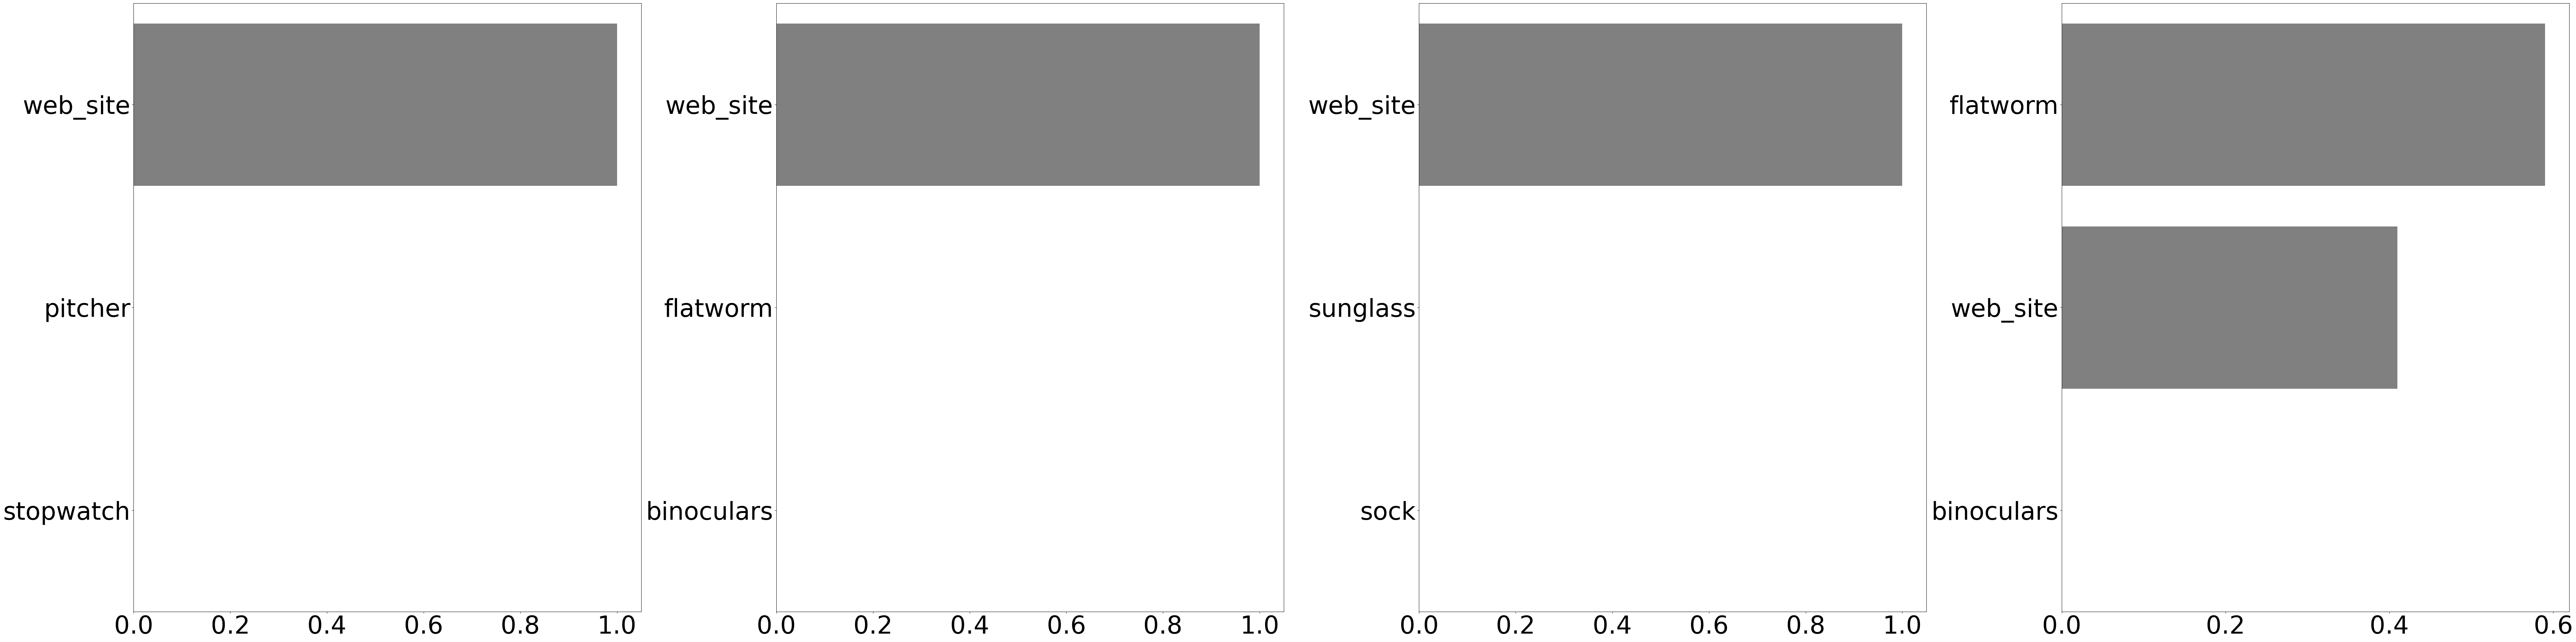

In [25]:
from keras.applications.inception_v3 import InceptionV3
inception_model = InceptionV3(weights='imagenet')
_get_predictions(inception_model)

## Resnet

C:\Users\Amir\AppData\Local\Temp\ipykernel_14736\802705997.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  ax[i].imshow(Image.open(imgs[i]).resize((200, 200), Image.ANTIALIAS))


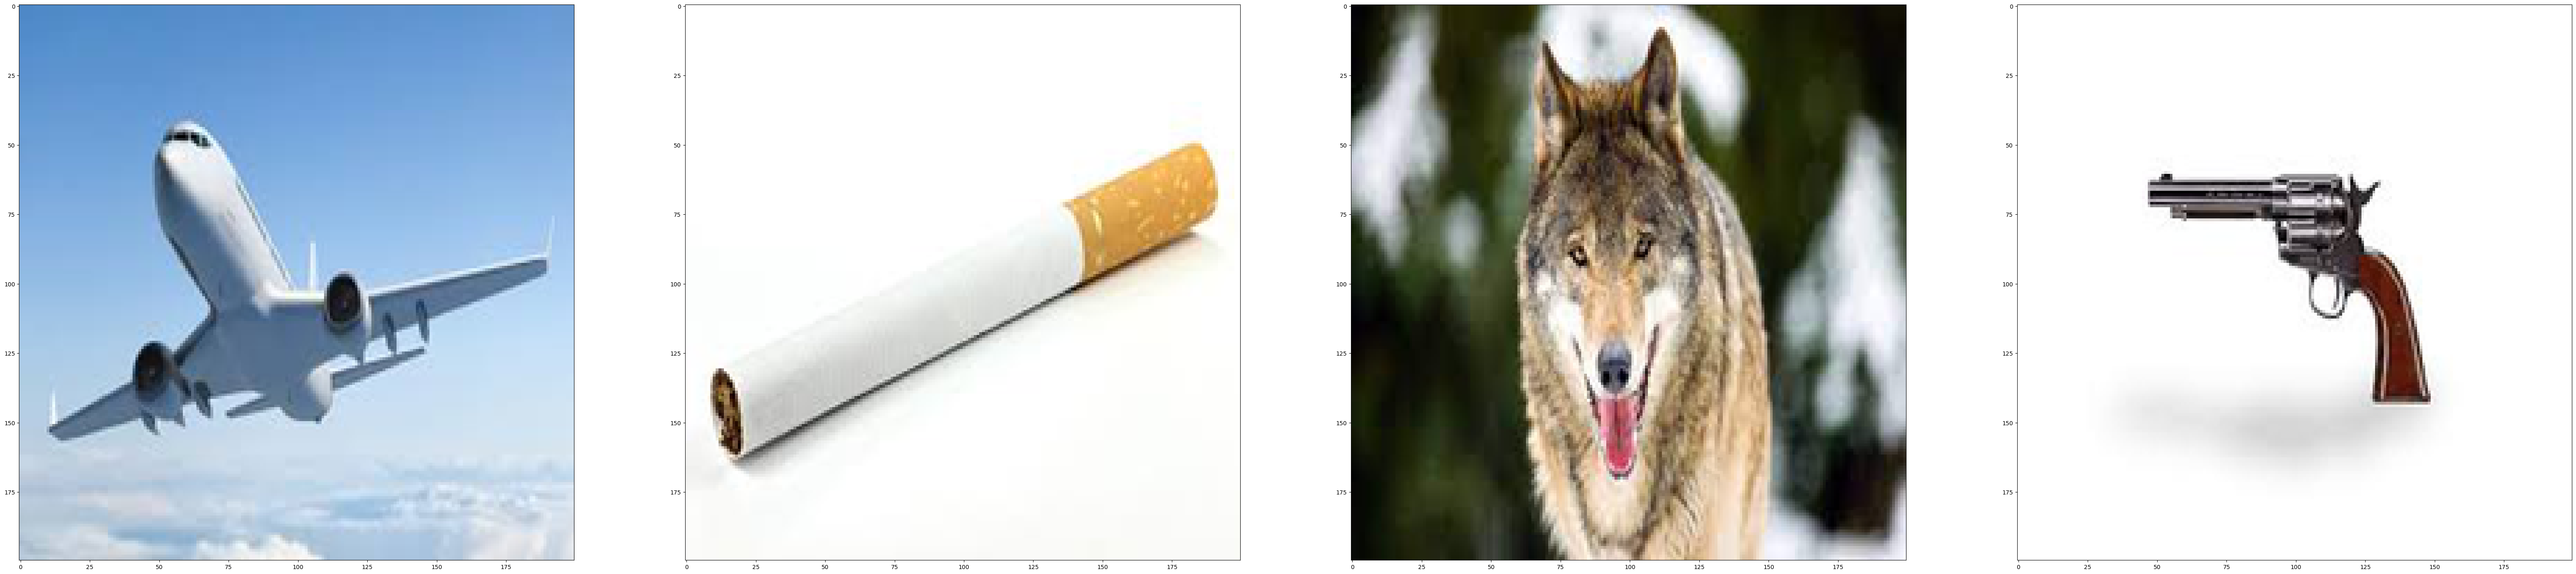

1/1 [==============================] - 0s 68ms/step


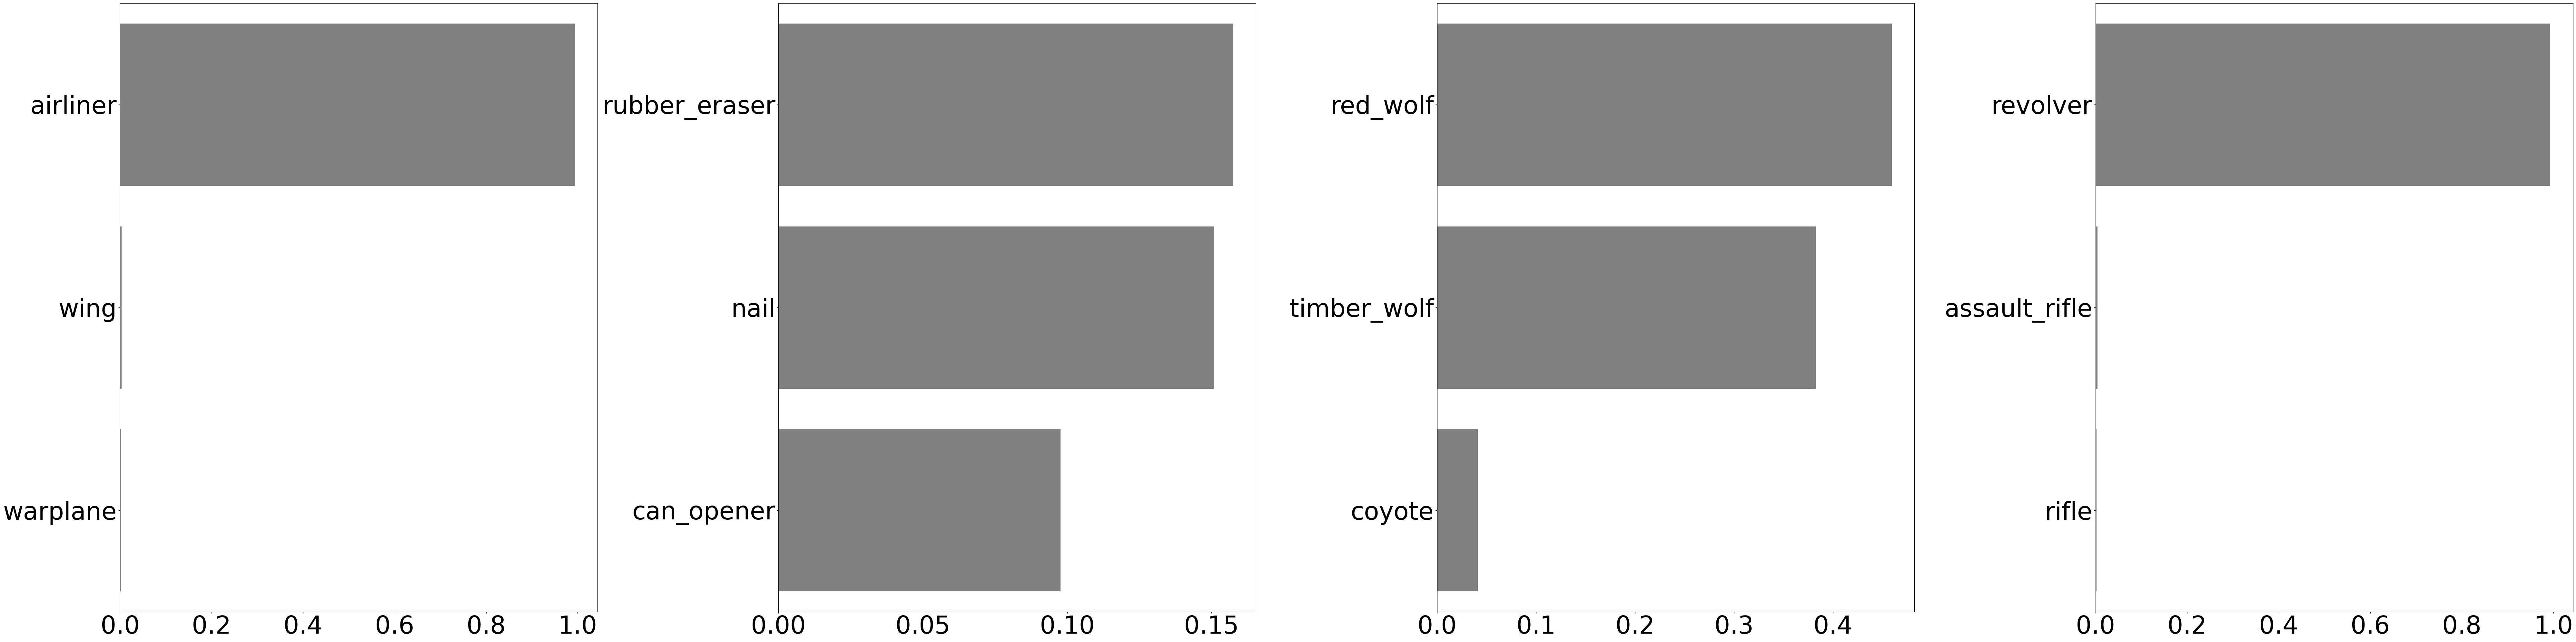

In [21]:
from keras.applications.resnet50 import ResNet50
resnet_model = ResNet50(inception_model)
_get_predictions(resnet_model)

##MobileNet

17225924/17225924 [==============================] - 4s 0us/step


C:\Users\Amir\AppData\Local\Temp\ipykernel_14736\802705997.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  ax[i].imshow(Image.open(imgs[i]).resize((200, 200), Image.ANTIALIAS))


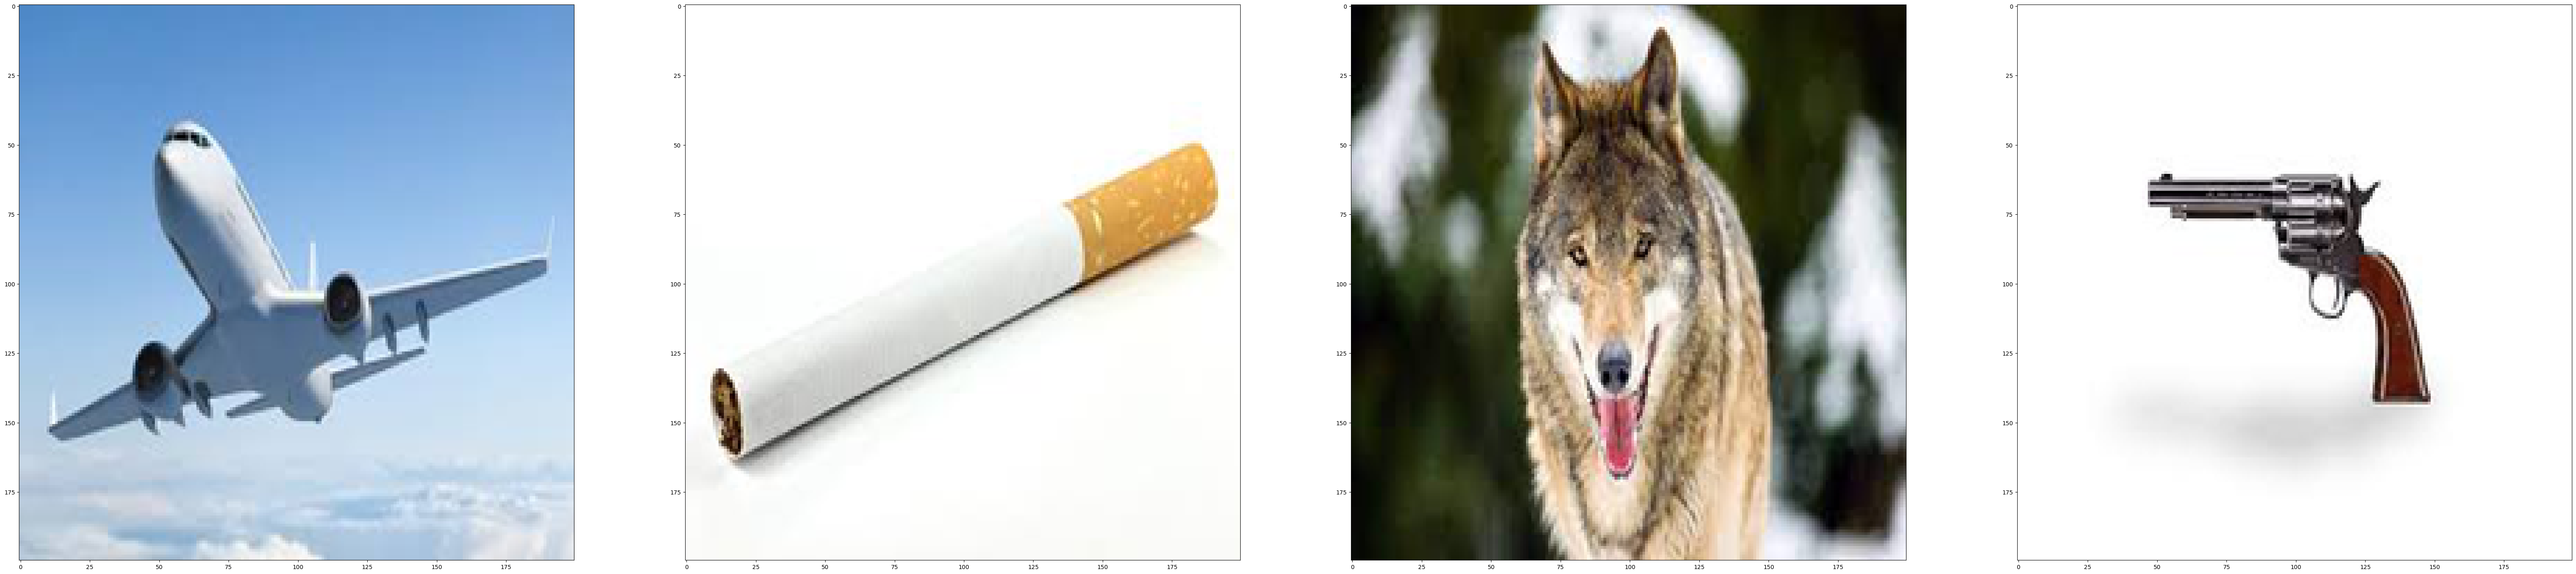

1/1 [==============================] - 0s 23ms/step


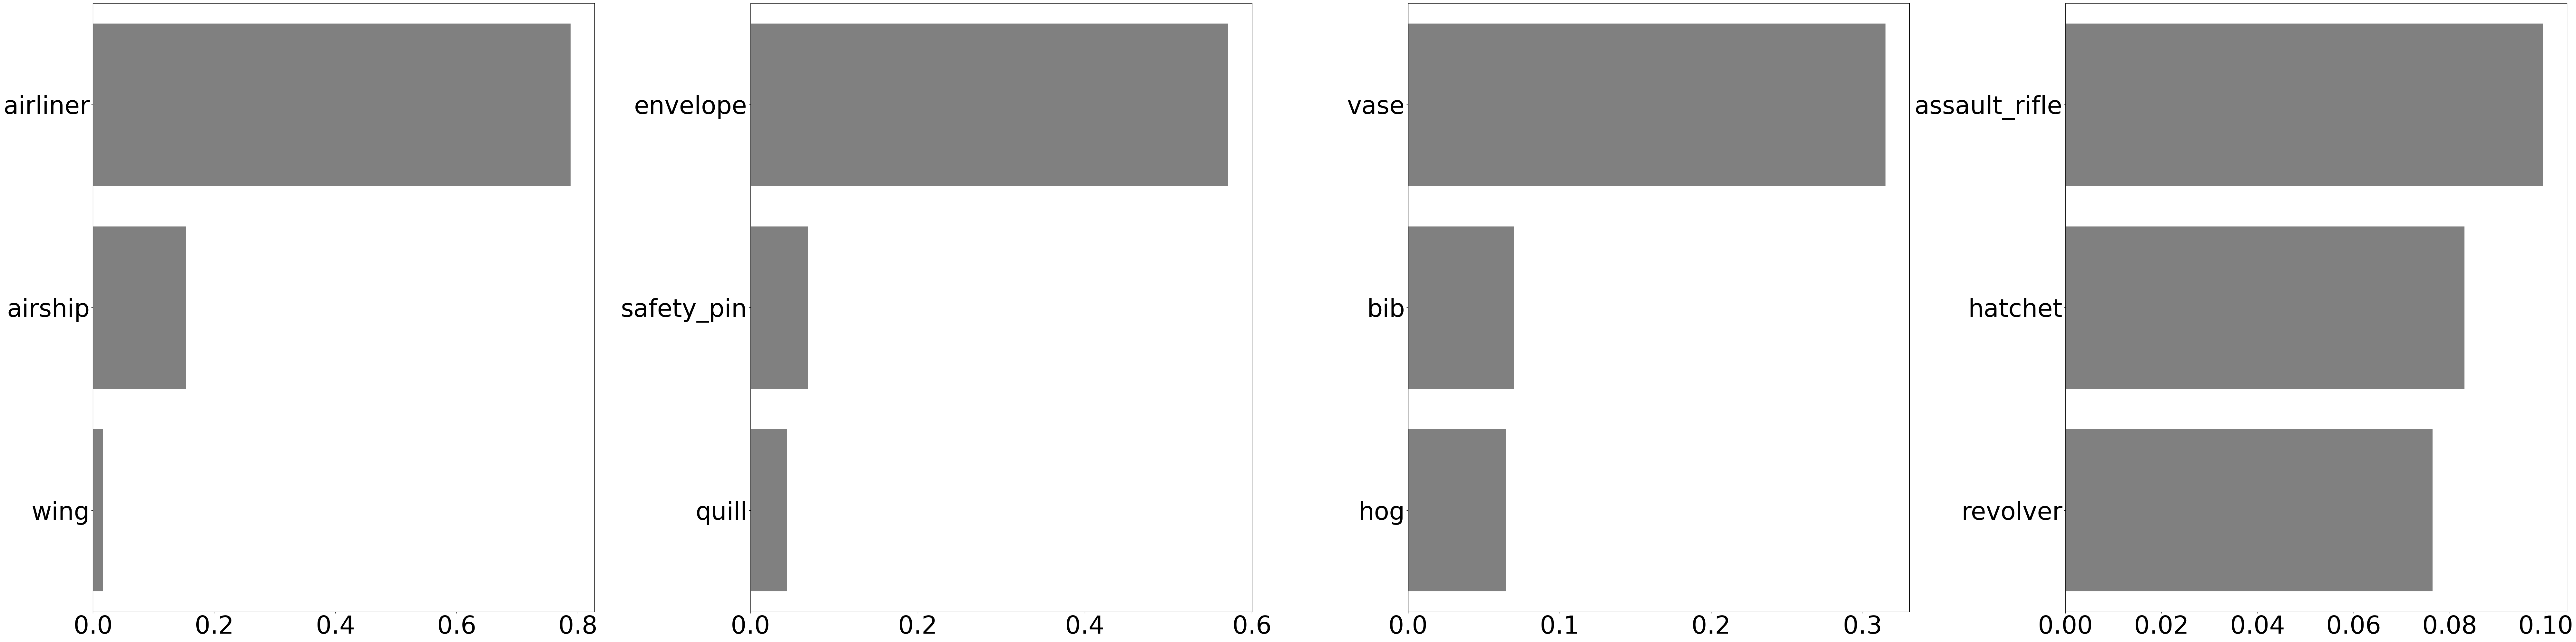

In [26]:
from tensorflow.keras.applications import MobileNet
model = MobileNet(weights='imagenet')
_get_predictions(model)